In [11]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号 #有中文出现的情况

In [12]:
class LogisticRegression_L1:
    
    class Model:
        """
        desc:训练出的模型
        """
        def __init__(self,theta):
            """
            desc:根据传入的 θ 构建模型 
            """
            self.theta = theta
        def predict(self,x_test):
            """
            desc:根据传入的特征,利用模型预测数据
            """
            t = np.dot(x_test, self.theta)
            # 得出类别为 1 的概率
            result = LogisticRegression_L1.sigmoid(t)
            # 将所有数据取整  p > 0.5 return: 1 , p <= 0.5 return: 0
            return np.round(result)
    
    def __init__(self,alpha,theta,valve,lamb,L,batch_n=-1,max_iter=10**3):
        """
        :param: alpha: 学习率,也称梯度下降中每一步的步长
        :param: theta: 初始化的 θ 向量
        :param: valve: 阀值,训练过程中,如梯度值的绝对值小于阀值就会跳出训练
        :param: lamb: 正则化超参数（注意带默认值的参数要放在不带默认值参数的后面）
        :param: L: 用于近端梯度下降的L-lipschitz条件控制
        :param: batch_n: 取一个整数表示微梯度下降中采用的样本数量,-1表示每次迭代采用全部数据
        :param: max_iter: 最大的迭代次数,超过时自动跳出训练
        """
        self.alpha = alpha
        self.theta = theta
        self.valve = valve
        self.lamb = lamb
        self.L = L
        self.batch_n = batch_n
        self.max_iter = max_iter
        
    
    def fit(self,x_data,y_data):
        """
        :param x_data: 特征值
        :param y_data: 标签值
        """
        iter_cnt = 0  #初始化迭代次数为0
        data_len = x_data.shape[0]  #样本量n
        # 验证样参数是否满足要求,并使其满足要求
        self.batch_n = data_len if self.batch_n <= 0 or self.batch_n > data_len else self.batch_n
        # 开始迭代
        while self.__gradient_func(x_data,y_data) and iter_cnt < self.max_iter:
            iter_cnt += 1  #可以用loss_list记录下损失
        return self.Model(self.theta)
    
    def __gradient_func(self,x_data,y_data):
        """
        :param x_data: 特征值
        :param y_data: 标签值
        """
        gradient_vector = np.zeros(self.theta.size)  #梯度向量每一步初始化为全0向量
        data_len = x_data.shape[0]  #样本量n
        fetature_len = self.theta.shape[0]  #特征数p
        
        # 遍历特征维度
        for t in range(fetature_len):
            j_ = 0
            # 遍历样本数据
            for i in range(0,data_len,round(data_len/self.batch_n)):  #按照批量进行计算
                # 计算θx_1 + θx_2 + ... + θx_n    也就是公式中的(θ^TX)
                t1 = np.dot(x_data[i], self.theta)
                # 计算预测值 h_θ(x_i)
                h_theta = LogisticRegression_L1.sigmoid(t1)
                # 结果累加起来 (h_θ(x_i) - y_i)x_ij
                j_ += (h_theta-y_data[i])*x_data[i][t]
            # 除以处理的样本数量,也就是取均值
            j_ /= self.batch_n
            # 修改梯度下降方向向量中对应的值
            gradient_vector[t] = j_
        
        # 更新全局 θ 的值,也就是朝着下山的方向走一步
        para_change = gradient_vector/self.L
        z = self.theta - para_change

        for t in range(z.shape[0]):
            if self.lamb/self.L < z[t]:
                self.theta[t] = z[t] - self.lamb/self.L
            elif z[t] < -self.lamb/self.L:
                self.theta[t] = z[t] + self.lamb/self.L
            else:
                self.theta[t] = 0

        # 输出梯度是否达到阀值，且参数theta的改变是否大于阈值
        return np.linalg.norm(para_change) >= self.valve 
    
    @staticmethod
    def sigmoid(x):
        t = 1 + np.exp(-x)
        result = np.divide(1,t)
        return result

#### 用鸢尾花数据集进行验证

In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = np.column_stack(load_iris(return_X_y=True))
# 这里我们实现的只是二分类算法,左右只需要类别0和类别1两种即可
iris_data = iris_data[iris_data[:,-1]<2]
# 将数据打乱
np.random.shuffle(iris_data)
# 将数据分成两份
train_x,test_x,train_y,test_y = train_test_split(iris_data[:,:-1],iris_data[:,-1],test_size=0.3,random_state=2)

In [25]:
ini_theta = np.array([1]*train_x.shape[1],dtype=float)
l = LogisticRegression_L1(alpha=0.01,theta=ini_theta,valve=0.0001,lamb=0.01,L=1,batch_n=20,max_iter=1000)
m = l.fit(train_x,train_y)
pred_y = m.predict(test_x)

In [5]:
m.theta

array([ 0.        , -2.10670498,  2.50677576,  0.        ])

In [26]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

acc = accuracy_score(test_y,pred_y)
rec = recall_score(test_y,pred_y)
pre = precision_score(test_y,pred_y)
f1 = f1_score(test_y,pred_y)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))
print('beta参数估计为',m.theta)

预测准确率为:1.0000
预测查准率为:1.0000
预测召回率为:1.0000
预测f1-score为:1.0000
beta参数估计为 [-0.55122926 -1.79811109  2.84014044  0.        ]


In [10]:
train_x.shape

(70, 4)

In [24]:
ini_theta = np.array([1]*train_x.shape[1],dtype=float)
l = LogisticRegression_L1(alpha=0.01,theta=ini_theta,valve=0.0001,lamb=0.01,L=1,batch_n=-1,max_iter=1000)
m = l.fit(train_x,train_y)
pred_y = m.predict(test_x)

acc = accuracy_score(test_y,pred_y)
rec = recall_score(test_y,pred_y)
pre = precision_score(test_y,pred_y)
f1 = f1_score(test_y,pred_y)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))
print('beta参数估计为',m.theta)

预测准确率为:1.0000
预测查准率为:1.0000
预测召回率为:1.0000
预测f1-score为:1.0000
beta参数估计为 [ 0.         -2.51483219  2.77987009  0.        ]


#### 鸢尾花数据集采用sklearn的l1-逻辑回归

In [27]:
from sklearn.linear_model import LogisticRegression

lr_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
lr_l1.fit(train_x,train_y)
pred_y_lr = lr_l1.predict(test_x)

acc = accuracy_score(test_y,pred_y_lr)
rec = recall_score(test_y,pred_y_lr)
pre = precision_score(test_y,pred_y_lr)
f1 = f1_score(test_y,pred_y_lr)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))

print('sklearn的lasso参数估计为',lr_l1.coef_)

预测准确率为:1.0000
预测查准率为:1.0000
预测召回率为:1.0000
预测f1-score为:1.0000
sklearn的lasso参数估计为 [[ 0.         -2.28599163  2.53490536  0.        ]]


#### K折交叉验证选择超参数lamb

In [54]:
from sklearn.model_selection import KFold  # 从sklearn导入KFold包

#输入数据推荐使用numpy数组，使用list格式输入会报错
def K_Fold_spilt(K,fold,data,label):
    '''
    :param K: 要把数据集分成的份数。如十次十折取K=10
    :param fold: 要取第几折的数据。如要取第5折则fold=4(第一折为0)
    :param data: 需要分块的数据
    :param label: 对应的需要分块标签
    :return: 对应折的训练集、测试集和对应的标签
    '''
    split_list = []
    kf = KFold(n_splits=K,shuffle=True,random_state=55) #shuffle=True:乱序分配
    for train, test in kf.split(data):
        split_list.append(train.tolist())
        split_list.append(test.tolist())
    train,test=split_list[2 * fold],split_list[2 * fold + 1]
    return  data[train], data[test], label[train], label[test]  #已经分好块的数据集

In [55]:
def plot_curve(x_list,y_list,label,color,ylabel,title):
    plt.figure(figsize=(12,8))
    plt.plot(x_list,y_list,color=color,label=label)
    plt.xlabel('参数的选取范围')
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.title(title)
    plt.legend()
    plt.show()

e:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


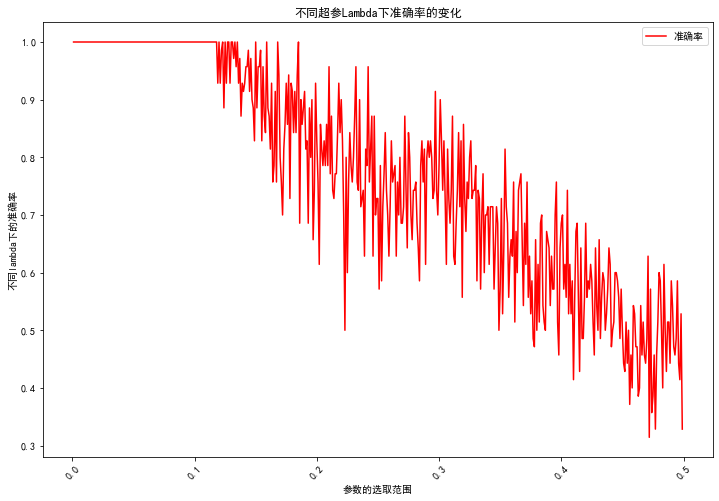

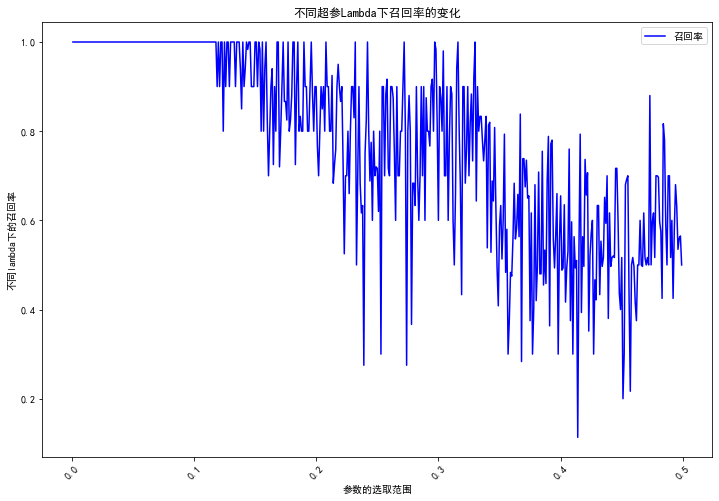

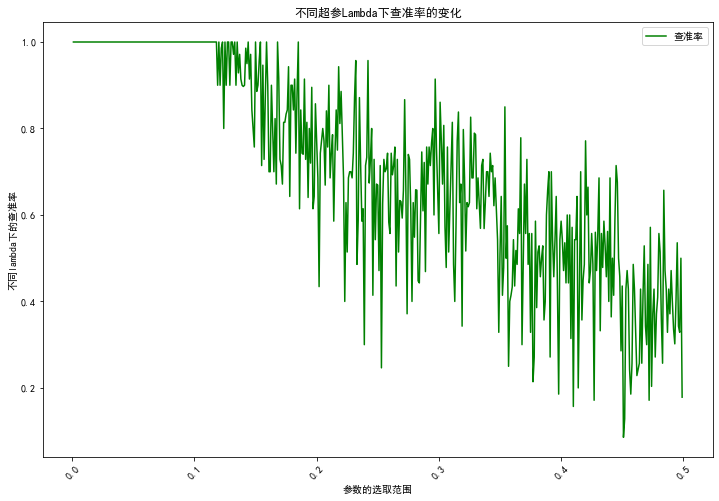

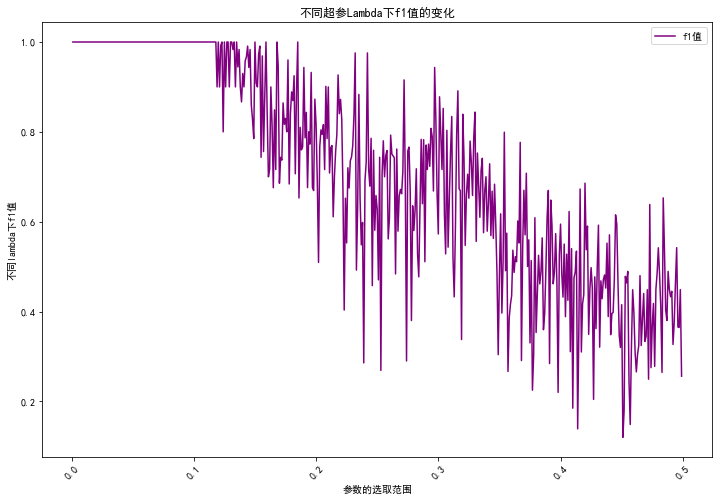

In [56]:
lamb_list = np.arange(0.001,0.5,0.001)
acc_lambda_list = []
rec_lambda_list = []
pre_lambda_list = []
f1_lambda_list = []
for lamb in lamb_list:
    K = 10
    acc_list = []
    rec_list = []
    pre_list = []
    f1_list = []
    for fold in range(K):
        fold_res = K_Fold_spilt(K,fold,train_x,train_y)
        x_train = fold_res[0]
        x_val = fold_res[1]
        y_train = fold_res[2]
        y_val = fold_res[3]

        ini_theta = np.array([1]*x_train.shape[1],dtype=float)
        l = LogisticRegression_L1(alpha=0.01,theta=ini_theta,valve=0.0001,lamb=lamb,L=1,batch_n=-1,max_iter=1000)
        m = l.fit(x_train,y_train)
        pred_yval = m.predict(x_val)
        
        acc = accuracy_score(y_val,pred_yval)
        rec = recall_score(y_val,pred_yval)
        pre = precision_score(y_val,pred_yval)
        f1 = f1_score(y_val,pred_yval)
        acc_list.append(acc)
        rec_list.append(rec)
        pre_list.append(pre)
        f1_list.append(f1)
    
    acc_lambda_list.append(np.mean(acc_list))
    rec_lambda_list.append(np.mean(rec_list))
    pre_lambda_list.append(np.mean(pre_list))
    f1_lambda_list.append(np.mean(f1_list))


plot_curve(lamb_list,acc_lambda_list,'准确率','red','不同lambda下的准确率','不同超参Lambda下准确率的变化')
plot_curve(lamb_list,rec_lambda_list,'召回率','blue','不同lambda下的召回率','不同超参Lambda下召回率的变化')
plot_curve(lamb_list,pre_lambda_list,'查准率','green','不同lambda下的查准率','不同超参Lambda下查准率的变化')
plot_curve(lamb_list,f1_lambda_list,'f1值','purple','不同lambda下f1值','不同超参Lambda下f1值的变化')


#### 用第五次作业数据进行验证

In [14]:
data = pd.read_csv('data.csv')

from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# 训练数据
train_x = train_data.iloc[:,1:].values 
train_y = np.array(train_data.iloc[:,0])
# 测试数据
test_x = test_data.iloc[:,1:].values
test_y = np.array(test_data.iloc[:,0])

In [18]:
ini_theta = np.array([1]*train_x.shape[1],dtype=float)
l = LogisticRegression_L1(0.1,ini_theta,0.0001,0.01,2,batch_n=-1,max_iter=1000) #-1为GD，1为SGD，其他大于1的值为mini-batch-SGD
m = l.fit(train_x,train_y)
pred_y = m.predict(test_x)

In [122]:
m.theta

array([ 1.078971  ,  1.29835848,  0.30968493, -0.87915177, -1.87177077])

In [19]:
acc = accuracy_score(test_y,pred_y)
rec = recall_score(test_y,pred_y)
pre = precision_score(test_y,pred_y)
f1 = f1_score(test_y,pred_y)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))
print('beta参数估计为',m.theta)

预测准确率为:0.7250
预测查准率为:0.7000
预测召回率为:0.7368
预测f1-score为:0.7179
beta参数估计为 [ 1.078971    1.29835848  0.30968493 -0.87915177 -1.87177077]


In [20]:
ini_theta = np.array([1]*train_x.shape[1],dtype=float)
l = LogisticRegression_L1(0.1,ini_theta,0.0001,0.01,2,batch_n=30,max_iter=1000) #-1为GD，1为SGD，其他大于1的值为mini-batch-SGD
m = l.fit(train_x,train_y)
pred_y = m.predict(test_x)

acc = accuracy_score(test_y,pred_y)
rec = recall_score(test_y,pred_y)
pre = precision_score(test_y,pred_y)
f1 = f1_score(test_y,pred_y)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))
print('beta参数估计为',m.theta)

预测准确率为:0.7250
预测查准率为:0.7000
预测召回率为:0.7368
预测f1-score为:0.7179
beta参数估计为 [ 0.05252352  3.8775144   0.         -0.58347568 -2.96031593]


#### 第五次作业数据集采用sklearn的l1-逻辑回归

In [120]:
from sklearn.linear_model import LogisticRegression

lr_l1 = LogisticRegression(penalty="l1", solver="liblinear", max_iter=1000)
lr_l1.fit(train_x,train_y)
pred_y_lr = lr_l1.predict(test_x)

acc = accuracy_score(test_y,pred_y_lr)
rec = recall_score(test_y,pred_y_lr)
pre = precision_score(test_y,pred_y_lr)
f1 = f1_score(test_y,pred_y_lr)

print('预测准确率为:{:.4f}'.format(acc))
print('预测查准率为:{:.4f}'.format(pre))
print('预测召回率为:{:.4f}'.format(rec))
print('预测f1-score为:{:.4f}'.format(f1))

print(lr_l1.coef_)

预测准确率为:0.7250
预测查准率为:0.6667
预测召回率为:0.8421
预测f1-score为:0.7442
[[ 1.20306623  1.42340844  0.40408349 -1.1069904  -1.98577756]]
